# P7_Scoring_00_Martinez_Nicolas_Modelisation

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Loading" data-toc-modified-id="Loading-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Loading</a></span><ul class="toc-item"><li><span><a href="#Modules" data-toc-modified-id="Modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Modules</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data</a></span></li></ul></li><li><span><a href="#Models" data-toc-modified-id="Models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models</a></span><ul class="toc-item"><li><span><a href="#Make-score" data-toc-modified-id="Make-score-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Make score</a></span></li><li><span><a href="#Oversampling-/-Undersampling" data-toc-modified-id="Oversampling-/-Undersampling-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Oversampling / Undersampling</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Training</a></span><ul class="toc-item"><li><span><a href="#Using-application_train" data-toc-modified-id="Using-application_train-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Using application_train</a></span></li><li><span><a href="#Using-data" data-toc-modified-id="Using-data-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Using data</a></span></li></ul></li><li><span><a href="#Optimisation" data-toc-modified-id="Optimisation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Optimisation</a></span><ul class="toc-item"><li><span><a href="#Test-App_train-VS-Data2" data-toc-modified-id="Test-App_train-VS-Data2-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Test App_train VS Data2</a></span></li><li><span><a href="#Test-Scorer-Weighted_fp_score" data-toc-modified-id="Test-Scorer-Weighted_fp_score-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Test Scorer Weighted_fp_score</a></span></li><li><span><a href="#Test-RandomizedSearchCV" data-toc-modified-id="Test-RandomizedSearchCV-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Test RandomizedSearchCV</a></span></li><li><span><a href="#In-depth-Opti" data-toc-modified-id="In-depth-Opti-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>In-depth Opti</a></span></li><li><span><a href="#Best-model" data-toc-modified-id="Best-model-2.4.5"><span class="toc-item-num">2.4.5&nbsp;&nbsp;</span>Best model</a></span></li></ul></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Feature importance</a></span><ul class="toc-item"><li><span><a href="#Sklearn" data-toc-modified-id="Sklearn-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>Sklearn</a></span></li><li><span><a href="#LGBM" data-toc-modified-id="LGBM-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#Shap" data-toc-modified-id="Shap-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>Shap</a></span><ul class="toc-item"><li><span><a href="#KernelExplainer" data-toc-modified-id="KernelExplainer-2.5.3.1"><span class="toc-item-num">2.5.3.1&nbsp;&nbsp;</span>KernelExplainer</a></span></li><li><span><a href="#TreeExplainer" data-toc-modified-id="TreeExplainer-2.5.3.2"><span class="toc-item-num">2.5.3.2&nbsp;&nbsp;</span>TreeExplainer</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#ready-to-API" data-toc-modified-id="ready-to-API-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>ready to API</a></span><ul class="toc-item"><li><span><a href="#sample" data-toc-modified-id="sample-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>sample</a></span></li><li><span><a href="#X_train2_sc_pd_mean" data-toc-modified-id="X_train2_sc_pd_mean-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>X_train2_sc_pd_mean</a></span></li><li><span><a href="#main_features" data-toc-modified-id="main_features-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>main_features</a></span></li><li><span><a href="#Other" data-toc-modified-id="Other-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Other</a></span></li></ul></li><li><span><a href="#Pipeline" data-toc-modified-id="Pipeline-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Pipeline</a></span></li></ul></div>

## Loading

### Modules

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import gc
import warnings
warnings.filterwarnings("ignore")
import time
import missingno as msno
from tqdm.notebook import trange, tqdm
import os
import z_nm_functions as nm
from collections import Counter
import pickle

In [2]:
if str(os.getcwd())[0] == "C":
    from sklearnex import patch_sklearn
    patch_sklearn()
else:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir("drive/MyDrive/OC/7_Dashboard_en_ligne")

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

from sklearn.metrics import PrecisionRecallDisplay , plot_confusion_matrix, precision_score, recall_score , f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.metrics import make_scorer, roc_curve, RocCurveDisplay

import shap

### Data

In [5]:
application_train = pd.read_pickle("application_train.pickle")
data2 = pd.read_pickle("data2.pickle")

In [6]:
with open('model_opti.pickle', 'rb') as f:
    model_opti = pickle.load(f)

In [7]:
with open('trained_models.pickle', 'rb') as f:
    trained_models = pickle.load(f)

In [8]:
with open('trained_models2.pickle', 'rb') as f:
    trained_models2 = pickle.load(f)

## Models

### Make score

In [7]:
def false_negative(y_t,y_p):
    return -confusion_matrix(y_t,y_p).ravel()[2] / y_t.shape[0]
# Make a scorer from a performance metric or loss function.
false_negative_score = make_scorer(false_negative)

In [8]:
def weighted_fp(y_t, y_p, wtn=1, wfp=7, wfn=10, wtp=1):
    tn, fp, fn, tp = confusion_matrix(y_t, y_p).ravel()
    S = wtn + wfp + wfn + wtp
    return -(wtn * tn + wfp * fp + wfn * fn + wtp * tp) / S
weighted_fp_score = make_scorer(weighted_fp)

In [9]:
def train_model(model, X_train, y_train, X_test, y_test): 
#     pipe = Pipeline([('scaler', StandardScaler()),('clf', model["clf"])])
    start_time = time.time()
    model["clf"].fit(X_train, y_train)
    train_time = time.time() - start_time

    train_accuracy =  model["clf"].score(X_train, y_train)
    test_accuracy = model["clf"].score(X_test, y_test) 
    y_predict = model["clf"].predict(X_test)
    
    plot_confusion_matrix(model["clf"], X_test, y_test, cmap = "Blues")
    plt.show()
#     print(classification_report(y_test,y_predict))
#     PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test)
#     plt.show()
#     fpr, tpr, _ = roc_curve(y_test, y_predict)
#     roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
#     plt.show()
     
    precision = precision_score(y_test,y_predict)
    recall = recall_score(y_test,y_predict)
    f1 = f1_score(y_test,y_predict)
    rocauc = roc_auc_score(y_test,y_predict)
    model_weighted_fp = weighted_fp(y_test,y_predict)
    
    model_details = {
                    "name": model["name"], 
                    "model": model["clf"],
                    "train_accuracy":train_accuracy, 
                    "test_accuracy":test_accuracy, 
                    "train_time": train_time, 
                    "precision": precision,
                    "recall": recall,
                    "f1": f1,
                    "weighted_fp": model_weighted_fp,
                    "rocauc": rocauc
                    }
    
    return model_details

### Oversampling / Undersampling

In [10]:
application_train.shape

(307511, 87)

In [11]:
X = application_train.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y = application_train.TARGET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y,  random_state=42)
SC = StandardScaler()
X_train_sc = SC.fit_transform(X_train)
X_test_sc = SC.transform(X_test)

In [12]:
print(Counter(y_train))
print(Counter(y_train)[0]/Counter(y_train)[1])

Counter({0.0: 197880, 1.0: 17377})
11.38746619094205


In [13]:
over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=1)

steps = [('o', over), ('u', under)]
osus = Pipeline(steps=steps)

X_train_sc, y_train = osus.fit_resample(X_train_sc, y_train)

print(Counter(y_train))
print(Counter(y_train)[0]/Counter(y_train)[1])

Counter({0.0: 98940, 1.0: 98940})
1.0


In [14]:
data2.shape

(307511, 150)

In [15]:
X2 = data2.drop(['SK_ID_CURR', 'TARGET'], axis=1)
y2 = data2.TARGET

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, stratify = y2,  random_state=42)

SC = StandardScaler()
X_train2_sc = SC.fit_transform(X_train2)
X_test2_sc = SC.transform(X_test2)

In [16]:
print(Counter(y_train2))
print(Counter(y_train2)[0]/Counter(y_train2)[1])

Counter({0.0: 197880, 1.0: 17377})
11.38746619094205


In [17]:
under = RandomUnderSampler(sampling_strategy=1)
over = SMOTE(sampling_strategy=0.5)

steps = [('o', over),('u', under)]
osus = Pipeline(steps=steps)

X_train2_sc, y_train2 = osus.fit_resample(X_train2_sc, y_train2)

print(Counter(y_train2))
print(Counter(y_train2)[0]/Counter(y_train2)[1])

Counter({0.0: 98940, 1.0: 98940})
1.0


In [23]:
X_train2_sc_pd = pd.DataFrame(X_train2_sc, columns= X_train2.columns)
X_test2_sc_pd = pd.DataFrame(X_test2_sc, columns= X_train2.columns)

### Training

#### Using application_train

  0%|          | 0/6 [00:00<?, ?it/s]

Logistic Regression


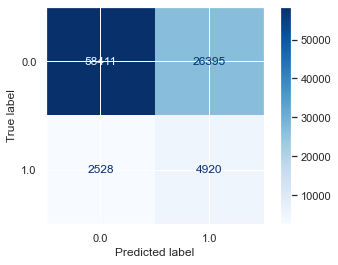

Decision Tree


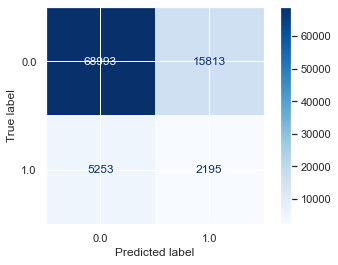

Random Forest


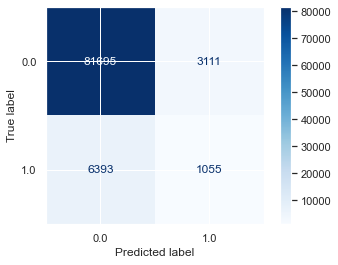

MLP Classifier


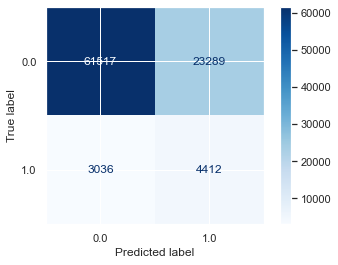

Gradient Boosting


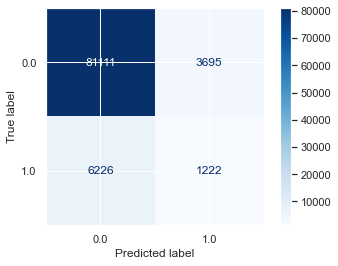

LGBM Gradient Boosting


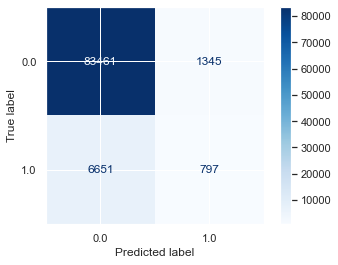

In [54]:
trained_models = [] #  keep track of all details for models we train
models = [
          {"name": "Logistic Regression", "clf": LogisticRegression()}, 
          {"name": "Decision Tree", "clf": DecisionTreeClassifier()},
          {"name": "Random Forest", "clf": RandomForestClassifier(n_estimators=100)},
          {"name": "MLP Classifier", "clf": MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10,10,5,2), max_iter=500, random_state=42)},
          {"name": "Gradient Boosting", "clf": GradientBoostingClassifier()},
          {"name": "LGBM Gradient Boosting", "clf": lgb.LGBMClassifier()}
        ]

for model in tqdm(models):
    print(model["name"])
    model_details = train_model(model, X_train_sc, y_train, X_test_sc, y_test) 
    trained_models.append(model_details)

In [55]:
model_df = pd.DataFrame(trained_models).sort_values(by = "weighted_fp", ascending= False)
model_df

,name,model,train_accuracy,test_accuracy,train_time,precision,recall,f1,weighted_fp,rocauc
5,LGBM Gradient Boosting,LGBMClassifier(),0.915191,0.913326,9.091767,0.372082,0.107009,0.166215,-8430.684211,0.545574
2,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.999990,0.896980,24.973572,0.253241,0.141649,0.181677,-8866.157895,0.552483
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.898004,0.892460,308.856247,0.248526,0.164071,0.197655,-8971.473684,0.560250
1,Decision Tree,DecisionTreeClassifier(),1.000000,0.771652,13.613170,0.121890,0.294710,0.172454,-12337.315789,0.554125
3,MLP Classifier,"MLPClassifier(alpha=0.1, hidden_layer_sizes=(1...",0.758414,0.714647,128.509496,0.159272,0.592374,0.251046,-13648.000000,0.658879
0,Logistic Regression,LogisticRegression(),0.691601,0.686485,1.811956,0.157113,0.660580,0.253850,-14388.210526,0.674670


#### Using data

  0%|          | 0/6 [00:00<?, ?it/s]

Logistic Regression


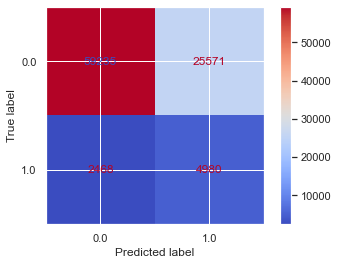

Decision Tree


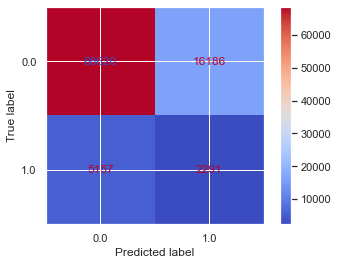

Random Forest


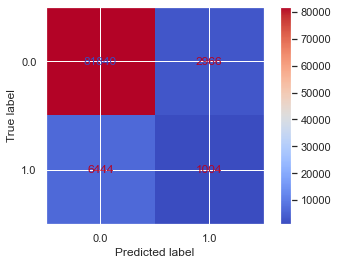

MLP Classifier


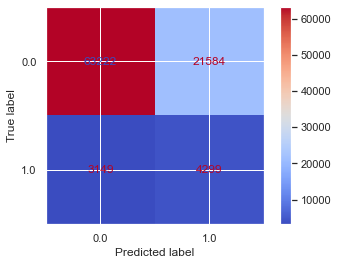

Gradient Boosting


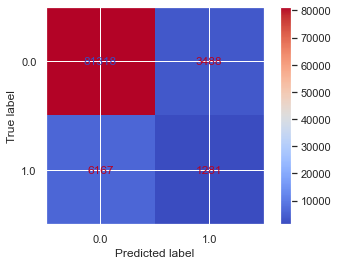

LGBM Gradient Boosting


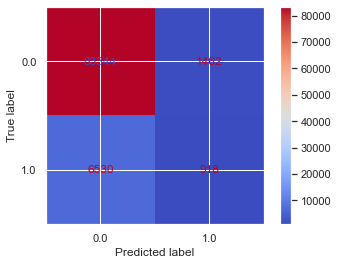

In [61]:
trained_models2 = [] #  keep track of all details for models we train
models2 = [
          {"name": "Logistic Regression", "clf": LogisticRegression()}, 
          {"name": "Decision Tree", "clf": DecisionTreeClassifier()},
          {"name": "Random Forest", "clf": RandomForestClassifier(n_estimators=100)}, 
          {"name": "MLP Classifier", "clf": MLPClassifier(solver='adam', alpha=1e-1, hidden_layer_sizes=(10,10,5,2), max_iter=500, random_state=42)},
          {"name": "Gradient Boosting", "clf": GradientBoostingClassifier()},
          {"name": "LGBM Gradient Boosting", "clf": lgb.LGBMClassifier()}
        ]

for model in tqdm(models2):
    print(model["name"])
    model_details = train_model(model, X_train2_sc, y_train2, X_test2_sc, y_test2) 
    trained_models2.append(model_details)

In [58]:
model_df2 = pd.DataFrame(trained_models2).sort_values(by = "weighted_fp", ascending= False)

In [59]:
model_df["data"] = "Application_train"
model_df2["data"] = "Data2"

In [60]:
model_results = model_df.append(model_df2).sort_values(by = "weighted_fp", ascending= False).reset_index(drop = True)
model_results

,name,model,train_accuracy,test_accuracy,train_time,precision,recall,f1,weighted_fp,rocauc,data
0,LGBM Gradient Boosting,LGBMClassifier(),0.916844,0.913370,15.224074,0.385714,0.123255,0.186813,-8410.315789,0.553008,Data2
1,LGBM Gradient Boosting,LGBMClassifier(),0.915191,0.913326,9.091767,0.372082,0.107009,0.166215,-8430.684211,0.545574,Application_train
2,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.999965,0.897999,34.388205,0.252897,0.134801,0.175863,-8844.526316,0.549914,Data2
3,Random Forest,"(DecisionTreeClassifier(max_features='auto', r...",0.999990,0.896980,24.973572,0.253241,0.141649,0.181677,-8866.157895,0.552483,Application_train
4,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.902037,0.895343,571.346885,0.268610,0.171992,0.209708,-8878.157895,0.565432,Data2
5,Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,0.898004,0.892460,308.856247,0.248526,0.164071,0.197655,-8971.473684,0.560250,Application_train
6,Decision Tree,DecisionTreeClassifier(),1.000000,0.771652,13.613170,0.121890,0.294710,0.172454,-12337.315789,0.554125,Application_train
7,Decision Tree,DecisionTreeClassifier(),1.000000,0.768650,27.529169,0.123992,0.307599,0.176741,-12409.631579,0.558370,Data2
8,MLP Classifier,"MLPClassifier(alpha=0.1, hidden_layer_sizes=(1...",0.774737,0.731903,138.436086,0.166094,0.577202,0.257958,-13163.105263,0.661346,Data2
9,MLP Classifier,"MLPClassifier(alpha=0.1, hidden_layer_sizes=(1...",0.758414,0.714647,128.509496,0.159272,0.592374,0.251046,-13648.000000,0.658879,Application_train


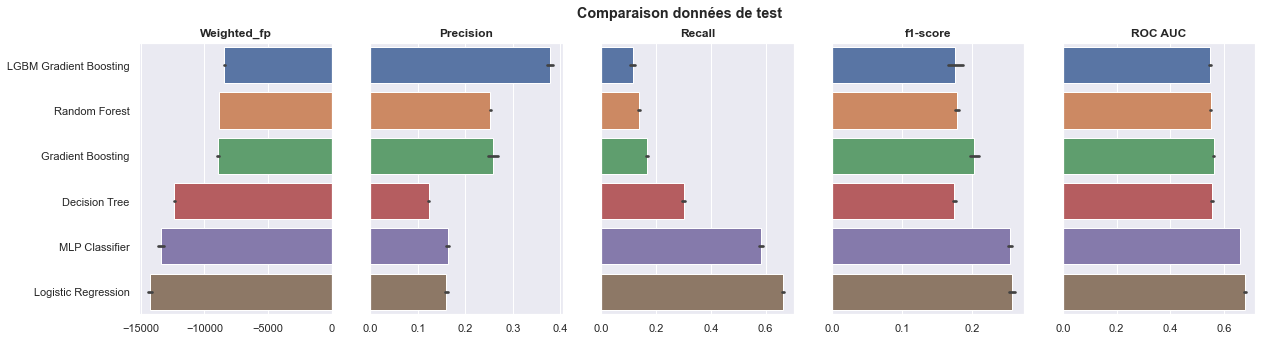

In [61]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20,5))
sns.barplot(x="weighted_fp", y= "name", data=model_results, ax = ax1) 
sns.barplot(x="precision", y= "name", data=model_results, ax = ax2) 
sns.barplot(x="recall", y= "name", data=model_results, ax = ax3) 
sns.barplot(x="f1", y= "name", data=model_results, ax = ax4) 
sns.barplot(x="rocauc", y= "name", data=model_results, ax = ax5) 

ax1.set_title("Weighted_fp", weight ="bold")
ax2.set_title("Precision", weight ="bold")
ax3.set_title("Recall", weight ="bold")
ax4.set_title("f1-score", weight ="bold")
ax5.set_title("ROC AUC", weight ="bold")

ax1.set(xlabel="", ylabel="")
ax2.set(xlabel="", ylabel="", yticklabels=[])
ax3.set(xlabel="", ylabel="", yticklabels=[])
ax4.set(xlabel="", ylabel="", yticklabels=[])
ax5.set(xlabel="", ylabel="", yticklabels=[])

fig.suptitle("Comparaison données de test", weight ="bold")
plt.show()

In [66]:
with open('trained_models.pickle', 'wb') as f:
    pickle.dump(trained_models, f)

In [67]:
with open('trained_models2.pickle', 'wb') as f:
    pickle.dump(trained_models2, f)

### Optimisation

In [18]:
cv_columns= ['params','data',
       'param_learning_rate', 'param_max_depth', 'param_min_child_samples',
       'param_min_child_weight', 'param_min_split_gain', 'param_num_leaves',
        'mean_fit_time', 'mean_score_time', 'mean_test_score', 'rank_test_score']

#### Test App_train VS Data2

In [63]:
params_lgb_light = { 
    'learning_rate':[0.05], 
    'num_leaves':[2, 3, 4], 
    'min_split_gain':[0.01],
    'max_depth':[2, 3, 4],
    'min_child_samples': [100],
    'min_child_weight':[0.01]
    }

In [64]:
cv2_train = GridSearchCV(lgb.LGBMClassifier(),
                         param_grid=params_lgb_light,
                         scoring="roc_auc",
                         n_jobs=-1,
                         cv=5,
                         verbose=10)

start = time.time()
cv2_train.fit(X_train_sc, y_train)
time.time() - start

Fitting 5 folds for each of 9 candidates, totalling 45 fits


138.00369954109192

In [66]:
cv2_data = GridSearchCV(lgb.LGBMClassifier(),
                        param_grid=params_lgb_light,
                        scoring="roc_auc",
                        n_jobs=-1,
                        cv=5,
                        verbose=10)

start = time.time()
cv2_data.fit(X_train2_sc, y_train2)
time.time() - start

Fitting 5 folds for each of 9 candidates, totalling 45 fits


234.05813717842102

In [68]:
cv2_train_results = pd.DataFrame(cv2_train.cv_results_)
cv2_train_results["data"] = "Application_train"

cv2_data_results = pd.DataFrame(cv2_data.cv_results_)
cv2_data_results["data"] = "Data2"

cv2_results = cv2_data_results.append(cv2_train_results)
cv2_results[cv_columns].sort_values(by="mean_test_score", ascending=False).reset_index(drop=True)

,params,data,param_learning_rate,param_max_depth,param_min_child_samples,param_min_child_weight,param_min_split_gain,param_num_leaves,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
0,"{'learning_rate': 0.05, 'max_depth': 3, 'min_c...",Data2,0.05,3,100,0.01,0.01,4,41.077497,0.720793,0.920948,1
1,"{'learning_rate': 0.05, 'max_depth': 4, 'min_c...",Data2,0.05,4,100,0.01,0.01,4,30.210032,0.357299,0.920948,1
2,"{'learning_rate': 0.05, 'max_depth': 2, 'min_c...",Data2,0.05,2,100,0.01,0.01,4,34.781147,0.536271,0.915628,3
3,"{'learning_rate': 0.05, 'max_depth': 3, 'min_c...",Data2,0.05,3,100,0.01,0.01,3,39.776802,0.615621,0.910310,4
4,"{'learning_rate': 0.05, 'max_depth': 4, 'min_c...",Data2,0.05,4,100,0.01,0.01,3,38.727280,0.550622,0.910310,4
5,"{'learning_rate': 0.05, 'max_depth': 2, 'min_c...",Data2,0.05,2,100,0.01,0.01,3,35.037208,0.571874,0.910310,4
6,"{'learning_rate': 0.05, 'max_depth': 4, 'min_c...",Application_train,0.05,4,100,0.01,0.01,4,16.057307,0.313431,0.910211,1
7,"{'learning_rate': 0.05, 'max_depth': 3, 'min_c...",Application_train,0.05,3,100,0.01,0.01,4,20.380036,0.544597,0.910211,1
8,"{'learning_rate': 0.05, 'max_depth': 2, 'min_c...",Application_train,0.05,2,100,0.01,0.01,4,19.268855,0.476692,0.897390,3
9,"{'learning_rate': 0.05, 'max_depth': 3, 'min_c...",Application_train,0.05,3,100,0.01,0.01,3,19.997481,0.435945,0.889016,4


<AxesSubplot:xlabel='rank_test_score', ylabel='mean_test_score'>

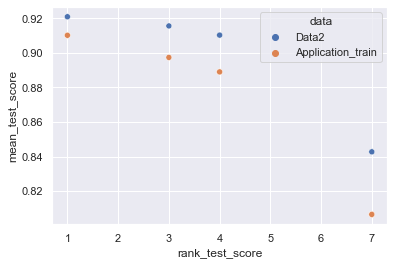

In [78]:
sns.scatterplot(x = cv2_results["rank_test_score"], y = cv2_results["mean_test_score"], hue = cv2_results["data"])

#### Test Scorer Weighted_fp_score

In [91]:
cv2_train_fp = GridSearchCV(lgb.LGBMClassifier(), param_grid= params_lgb_light ,scoring= weighted_fp_score, n_jobs=-1, cv=5 ,verbose=10)

start = time.time()
cv2_train_fp.fit(X_train2_sc, y_train2)
time.time() - start

Fitting 5 folds for each of 9 candidates, totalling 45 fits


161.10481548309326

In [86]:
cv2_train_fp_results = pd.DataFrame(cv2_train_fp.cv_results_)
cv2_train_fp_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_samples,param_min_child_weight,param_min_split_gain,param_num_leaves,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.216146,0.683518,0.552079,0.087421,0.05,2,100,0.01,0.01,2,"{'learning_rate': 0.05, 'max_depth': 2, 'min_c...",-9101.368421,-4814.210526,-4806.947368,-4782.157895,-4753.263158,-5651.589474,1725.02174,1
1,10.691646,0.617747,0.485120,0.082061,0.05,3,100,0.01,0.01,2,"{'learning_rate': 0.05, 'max_depth': 3, 'min_c...",-9101.368421,-4814.210526,-4806.947368,-4782.157895,-4753.263158,-5651.589474,1725.02174,1
2,10.082794,0.494124,0.275253,0.025610,0.05,4,100,0.01,0.01,2,"{'learning_rate': 0.05, 'max_depth': 4, 'min_c...",-9101.368421,-4814.210526,-4806.947368,-4782.157895,-4753.263158,-5651.589474,1725.02174,1


#### Test RandomizedSearchCV

In [80]:
rs = RandomizedSearchCV(lgb.LGBMClassifier(), param_distributions=params_lgb_light, scoring=weighted_fp_score, n_jobs=-1, cv=5 ,verbose=10)

start = time.time()
rs.fit(X_train2_sc,y_train2)
time.time() - start

Fitting 5 folds for each of 9 candidates, totalling 45 fits


254.96405220031738

In [82]:
rs_results = pd.DataFrame(rs.cv_results_).sort_values(by="mean_test_score", ascending=False).reset_index(drop=True)
rs_results["data"] = "Data2"
rs_results[cv_columns]

,params,data,param_learning_rate,param_max_depth,param_min_child_samples,param_min_child_weight,param_min_split_gain,param_num_leaves,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
0,"{'num_leaves': 4, 'min_split_gain': 0.01, 'min...",Data2,0.05,3,100,0.01,0.01,4,42.298935,0.794515,-4662.410526,1
1,"{'num_leaves': 4, 'min_split_gain': 0.01, 'min...",Data2,0.05,4,100,0.01,0.01,4,30.154095,0.419726,-4662.410526,1
2,"{'num_leaves': 4, 'min_split_gain': 0.01, 'min...",Data2,0.05,2,100,0.01,0.01,4,39.727177,0.914507,-4780.389474,3
3,"{'num_leaves': 3, 'min_split_gain': 0.01, 'min...",Data2,0.05,2,100,0.01,0.01,3,46.501622,0.919661,-4898.368421,4
4,"{'num_leaves': 3, 'min_split_gain': 0.01, 'min...",Data2,0.05,3,100,0.01,0.01,3,41.161651,0.739963,-4898.368421,4
5,"{'num_leaves': 3, 'min_split_gain': 0.01, 'min...",Data2,0.05,4,100,0.01,0.01,3,39.987989,0.630395,-4898.368421,4
6,"{'num_leaves': 2, 'min_split_gain': 0.01, 'min...",Data2,0.05,2,100,0.01,0.01,2,39.747520,0.767702,-5697.000000,7
7,"{'num_leaves': 2, 'min_split_gain': 0.01, 'min...",Data2,0.05,3,100,0.01,0.01,2,36.541060,0.670023,-5697.000000,7
8,"{'num_leaves': 2, 'min_split_gain': 0.01, 'min...",Data2,0.05,4,100,0.01,0.01,2,35.045003,0.620428,-5697.000000,7


#### In-depth Opti

In [97]:
params_lgb = { 
            'learning_rate':[0.05, 0.1, 0.5], 
            'max_depth':[2 , 4 , 6],
            'min_child_samples': [100,300,500],
            'min_split_gain':[0.01, 0.05],
            'num_leaves':[2,12,48], 
            'min_child_weight':[0.01 ,0.05, 0.1]
            }

In [77]:
cv = GridSearchCV(lgb.LGBMClassifier(), param_grid= params_lgb ,scoring= weighted_fp_score, n_jobs=-1, cv=5, verbose=10)

In [78]:
cv.fit(X_train2_sc,y_train2)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [2, 4, 6],
                         'min_child_samples': [100, 300, 500],
                         'min_child_weight': [0.01, 0.05, 0.1],
                         'min_split_gain': [0.01, 0.05],
                         'num_leaves': [2, 12, 48]},
             scoring=make_scorer(weighted_fp), verbose=10)

In [81]:
cv.best_estimator_

LGBMClassifier(max_depth=6, min_child_samples=500, min_child_weight=0.01,
               min_split_gain=0.05, num_leaves=48)

In [96]:
cv_results = pd.DataFrame(cv.cv_results_).sort_values(by="mean_test_score", ascending=False).reset_index(drop=True)
cv_results["data"] = "Data2"
cv_results[cv_columns].head(10)

,params,data,param_learning_rate,param_max_depth,param_min_child_samples,param_min_child_weight,param_min_split_gain,param_num_leaves,mean_fit_time,mean_score_time,mean_test_score,rank_test_score
0,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,500,0.1,0.05,48,39.738072,0.917471,-3908.557895,1
1,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,500,0.05,0.05,48,40.390897,0.838517,-3908.557895,1
2,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,500,0.01,0.05,48,39.912971,0.881493,-3908.557895,1
3,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,500,0.1,0.01,48,40.095469,0.847110,-3908.621053,4
4,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,500,0.05,0.01,48,39.510803,0.882091,-3908.621053,4
5,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,500,0.01,0.01,48,40.600572,0.886090,-3908.621053,4
6,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,300,0.1,0.01,48,40.912199,0.876093,-3910.894737,7
7,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,300,0.01,0.01,48,40.862821,0.924668,-3910.894737,7
8,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,300,0.05,0.01,48,40.374302,0.903082,-3910.894737,7
9,"{'learning_rate': 0.1, 'max_depth': 6, 'min_ch...",Data2,0.1,6,300,0.01,0.05,48,42.068927,0.869299,-3911.400000,10


In [95]:
cv_results.loc[1].params

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 500,
 'min_child_weight': 0.05,
 'min_split_gain': 0.05,
 'num_leaves': 48}

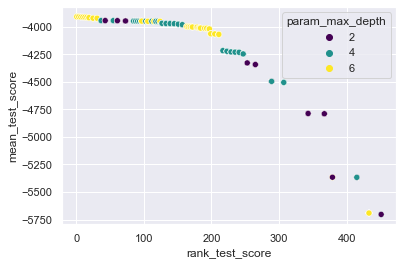

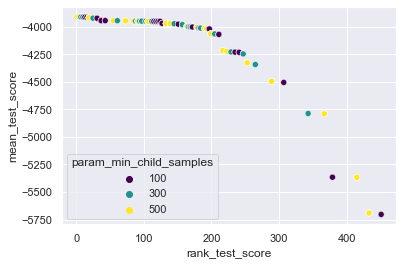

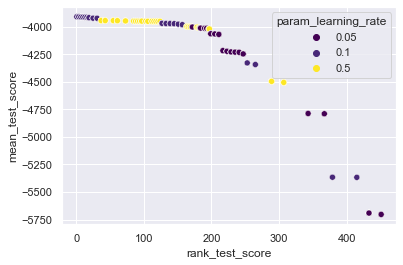

In [87]:
sns.scatterplot(x = cv_results["rank_test_score"], y = cv_results["mean_test_score"], hue = cv_results["param_max_depth"], palette = "viridis")
plt.show()
sns.scatterplot(x = cv_results["rank_test_score"], y = cv_results["mean_test_score"], hue = cv_results["param_min_child_samples"], palette = "viridis")
plt.show()
sns.scatterplot(x = cv_results["rank_test_score"], y = cv_results["mean_test_score"], hue = cv_results["param_learning_rate"], palette = "viridis")
plt.show()

#### Best model

In [98]:
params_opti = {'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_samples': 500,
 'min_child_weight': 0.05,
 'min_split_gain': 0.05,
 'num_leaves': 48}

In [99]:
model_opti = LGBMClassifier(**params_opti)

In [101]:
model_opti.fit(X_train2_sc_pd, y_train2)

LGBMClassifier(max_depth=6, min_child_samples=500, min_child_weight=0.05,
               min_split_gain=0.05, num_leaves=48)

In [119]:
model_opti.get_params

<bound method LGBMModel.get_params of LGBMClassifier(max_depth=6, min_child_samples=500, min_child_weight=0.05,
               min_split_gain=0.05, num_leaves=48)>

In [124]:
with open('model_opti.pickle', 'wb') as f:
    pickle.dump(model_opti, f)

### Feature importance

#### Sklearn

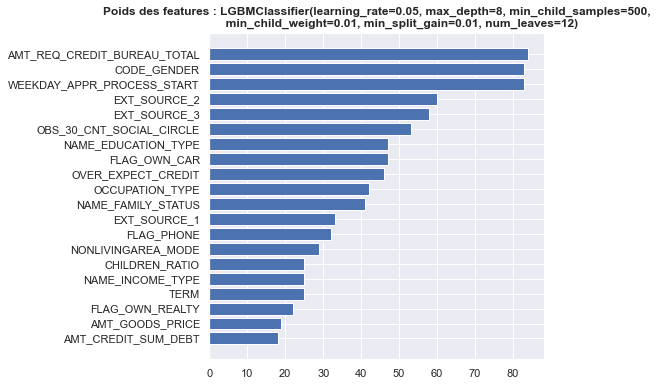

In [19]:
feature_names = X_train2.columns
y_ticks = np.arange(0, len(feature_names))
tree_feature_importances = model_opti.feature_importances_
sorted_idx = model_opti.feature_importances_.argsort()

fig, ax = plt.subplots(figsize = (6,6))
plt.barh(y_ticks[-20:],tree_feature_importances[sorted_idx][-20:])
ax.set_yticks(y_ticks[-20:])
ax.set_yticklabels(feature_names[sorted_idx][-20:])
ax.set_title("Poids des features : " +str(model_opti) , weight = "bold")
ax.set_ylabel('', weight = "bold")
plt.show()

#### LGBM

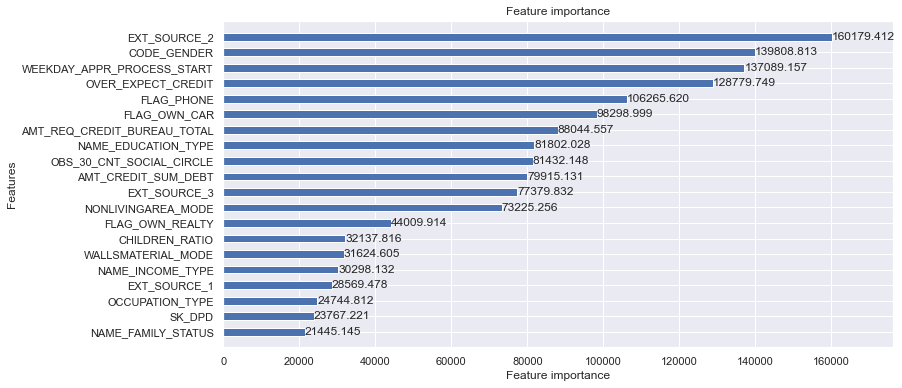

In [31]:
lgb.plot_importance(model_opti, height=0.5, max_num_features=20, ignore_zero = False, figsize = (12,6), importance_type ='gain')
plt.show()

#### Shap

In [37]:
shap.initjs()

##### KernelExplainer

In [105]:
explainer = shap.KernelExplainer(model_opti.predict_proba, shap.sample(X_train2_sc_pd, 1000))

In [106]:
row_to_show = 5
data_for_prediction = X_test2_sc_pd.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
print(model_opti.predict_proba(data_for_prediction_array))

shap_values_i = explainer.shap_values(data_for_prediction)
print(explainer.expected_value)

print('i  = 0')
shap.force_plot(explainer.expected_value[0], shap_values_i[0], data_for_prediction)

[[0.48742429 0.51257571]]
[0.52200136 0.47799864]
i  = 0


##### TreeExplainer

In [20]:
tree_explainer = shap.TreeExplainer(model_opti)

In [21]:
shap_values_tree = tree_explainer.shap_values(X_test2_sc_pd_sample)

NameError: name 'X_test2_sc_pd_sample' is not defined

In [109]:
shap_values_tree = pd.read_pickle("shap_values_tree.pickle")

In [34]:
tree_explainer.expected_value

[-0.24427510385395051, 0.24427510385395051]

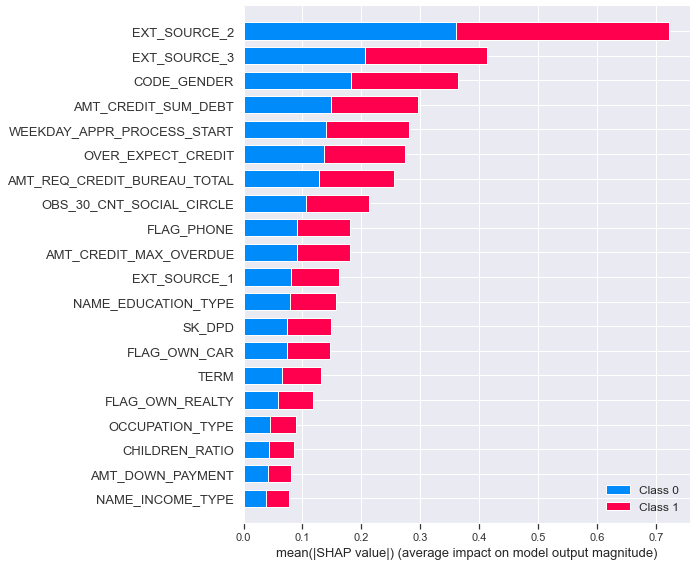

In [35]:
shap.summary_plot(shap_values_tree, feature_names=X_train2_sc_pd.columns)

In [38]:
shap.force_plot(tree_explainer.expected_value[0], shap_values_tree[0][0,:], X_train2_sc_pd.iloc[0,:])

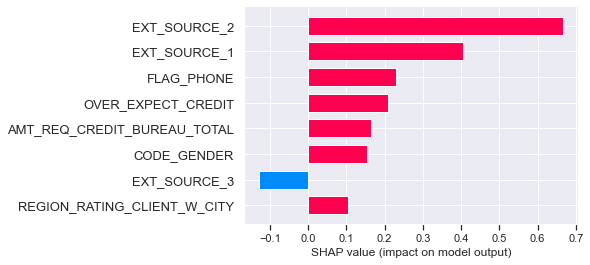

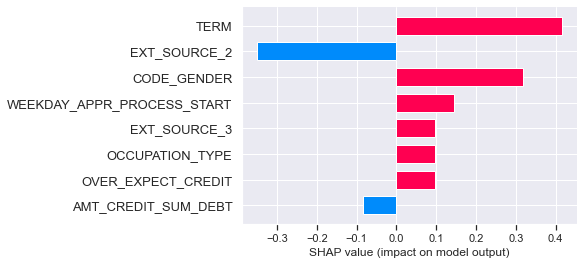

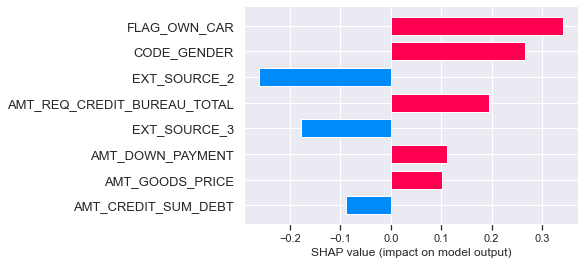

In [42]:
for i in range(3):
    shap.bar_plot(shap_values_tree[0][i], feature_names=X_train2_sc_pd.columns, max_display = 8)

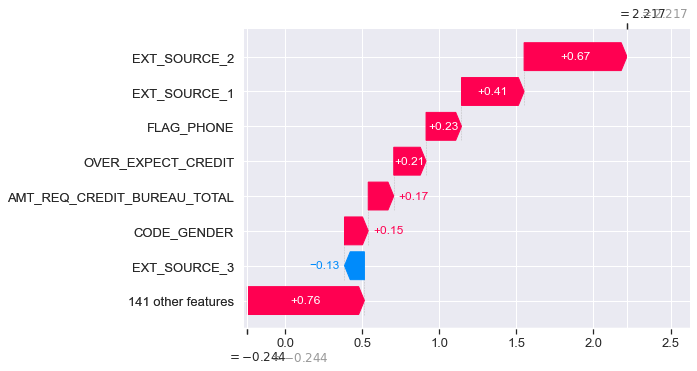

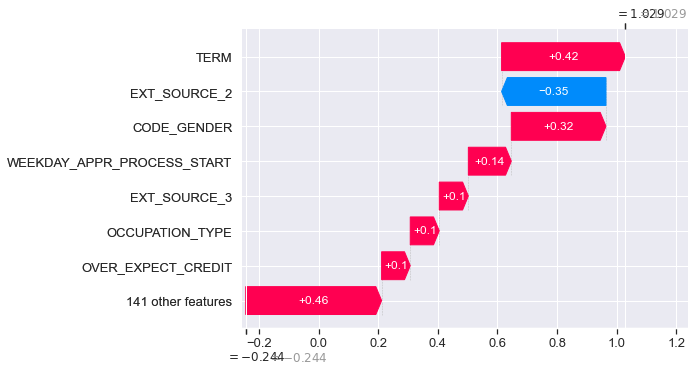

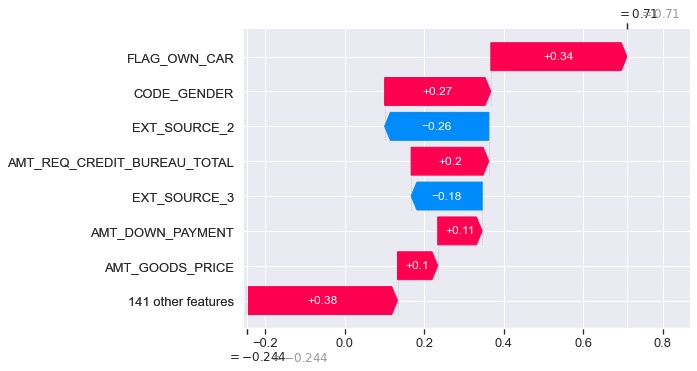

In [41]:
for i in range(3):
    shap.plots._waterfall.waterfall_legacy(tree_explainer.expected_value[0], shap_values_tree[0][i], feature_names = X_train2_sc_pd.columns, max_display = 8)

In [117]:
with open('shap_values_tree.pickle', 'wb') as f:
    pickle.dump(shap_values_tree, f)

## ready to API

In [24]:
main_features_pd = pd.read_csv("main_features_pd.csv", index_col="index")
X_train2_sc_pd_mean = pd.read_csv("X_train2_sc_pd_mean.csv", index_col="index")
sample = pd.read_csv("X_test2_sc_pd_sample.csv", index_col="index")

### sample

In [26]:
sample = X_test2_sc_pd.sample(20)

In [26]:
sample

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,0,1,2,3,4,5,C,X,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,AMT_APPLICATION,AMT_DOWN_PAYMENT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,TERM,OVER_EXPECT_CREDIT,MEAN_BUILDING_SCORE_AVG,TOTAL_BUILDING_SCORE_AVG,FLAG_DOCUMENT_TOTAL,AMT_REQ_CREDIT_BUREAU_TOTAL,BIRTH_EMPLOYED_INTERVEL,BIRTH_REGISTRATION_INTERVEL,INCOME_PER_FAMILY_MEMBER,SEASON_REMAINING,RATIO_INCOME_GOODS,CHILDREN_RATIO
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
90265,-0.325154,-0.721054,-0.717619,-1.506369,0.400795,0.977724,-2.384029,-0.262798,0.624169,-0.404299,-0.303990,1.833754,-0.802218,-0.146282,0.002155,0.468667,2.005837,0.043255,1.602108,-0.245658,1.951585,-2.066966,-2.050497,-0.505985,-0.325239,-0.123968,-0.232453,-0.207322,-0.290087,-0.546901,-0.468468,0.027983,2.378284,1.302891,-0.713499,-0.193185,-0.099346,0.050892,0.026416,-0.169329,-0.356027,-0.051741,-0.264425,-0.067408,-0.147933,-0.159634,-0.203444,-0.096277,-0.239428,-0.198659,-0.095679,0.046805,0.013236,-0.167415,-0.365493,-0.079998,-0.277797,-0.079100,-0.141893,-0.151474,-0.207539,-0.100553,-0.232998,0.043273,-0.089428,-0.221382,-0.092564,-0.087324,-0.583618,-0.319003,-0.581836,-0.274131,-1.151948,1.126178,-1.821739,-0.037518,-0.622121,-2.144911,-0.012195,-0.111046,-0.243228,-0.212027,-0.178774,-0.008919,-1.431517,-0.111330,-0.176865,-0.087120,-0.062511,-0.054127,-0.040936,-0.151955,-0.211131,0.045137,3.268165,2.927501,-0.070596,-0.016639,1.392482,-0.105167,0.091626,0.336142,-0.001234,0.066966,-0.902862,-0.039137,1.532747,0.385512,-0.315220,-0.491123,0.994829,0.901181,0.736291,-0.019410,0.374174,0.429429,0.442670,0.464728,0.

In [27]:
sample.index

Int64Index([90265, 75598, 40776, 68707, 28645, 54948, 65586,  3629,  3963,
             9821, 82402, 72612, 84321, 50957, 80822, 77734, 33821, 80802,
            91060, 59061],
           dtype='int64', name='index')

### X_train2_sc_pd_mean

In [55]:
X_train2_sc_pd_mean = X_train2_sc_pd.mean().round(2)
X_train2_sc_pd_mean["CODE_GENDER"]

0.08

### main_features

In [20]:
main_features = ['EXT_SOURCE_1',
                'EXT_SOURCE_2',
                'EXT_SOURCE_3',
                'CODE_GENDER',
                'NAME_FAMILY_STATUS',
                'AMT_REQ_CREDIT_BUREAU_TOTAL',
                'BIRTH_EMPLOYED_INTERVEL',
                'AMT_INCOME_TOTAL',
                'AMT_GOODS_PRICE',
                'AMT_CREDIT_SUM_DEBT']

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
EXT_SOURCE_1,0,197880,-3.507449,-0.223228,0.013770,-0.141158,0.013770,3.206794,0.902906,0.950213,-0.356916,1.896935


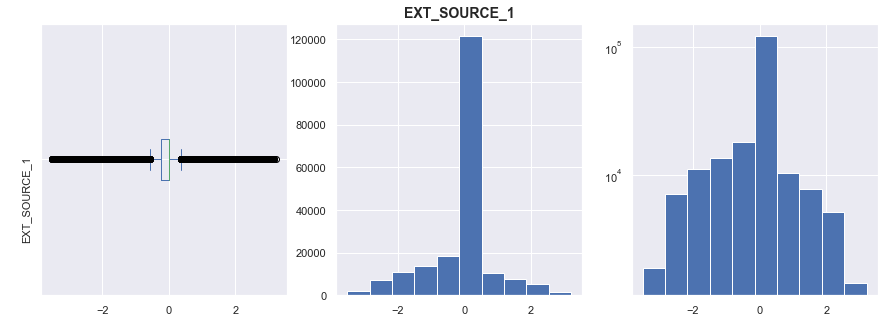

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
EXT_SOURCE_2,0,197880,-2.695291,-1.031389,-0.050881,-0.254992,0.586068,1.783975,1.061189,1.030140,-0.484870,-0.769272


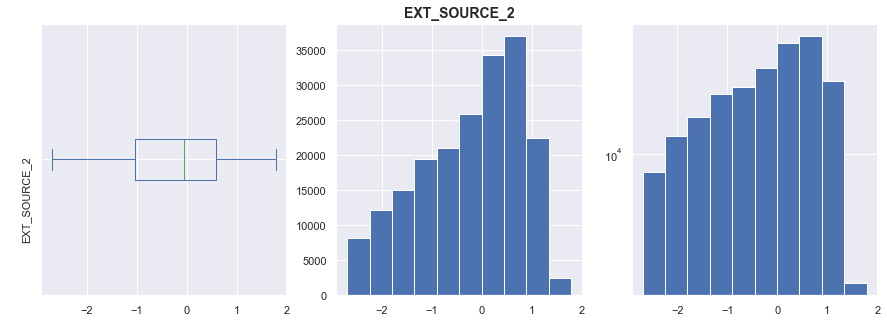

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
EXT_SOURCE_3,0,197880,-2.949046,-0.874392,0.091534,-0.213084,0.373182,2.177076,1.001918,1.000959,-0.407711,-0.292507


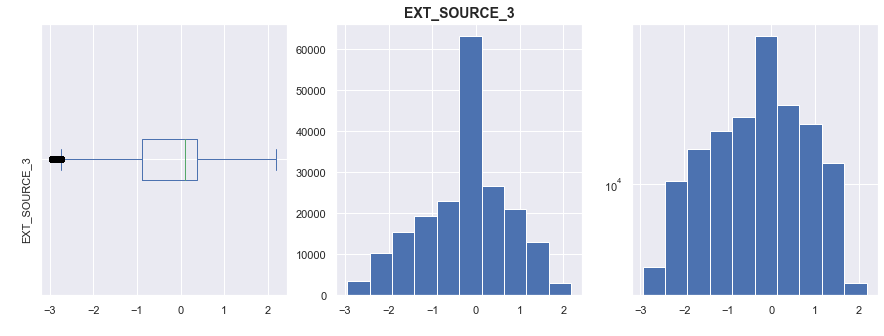

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
CODE_GENDER,0,197880,-0.721054,-0.721054,-0.721054,0.079287,1.386744,3.494542,0.961583,0.980603,0.494714,-1.681642


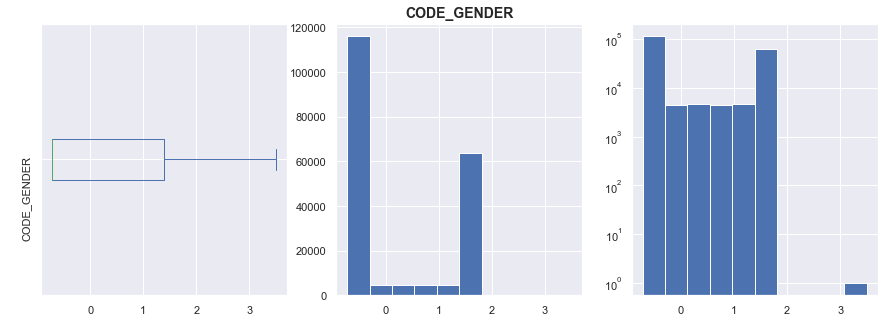

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
NAME_FAMILY_STATUS,0,197880,-1.259823,-0.404299,-0.404299,-0.020695,0.434608,3.017798,0.874787,0.935300,1.520016,2.218993


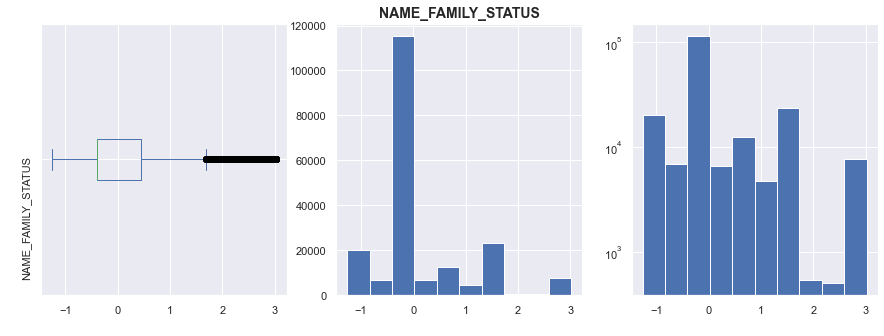

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
AMT_REQ_CREDIT_BUREAU_TOTAL,0,197880,-0.955329,-0.955329,-0.245477,-0.044731,0.383324,12.431208,0.891758,0.944329,1.432173,3.313377


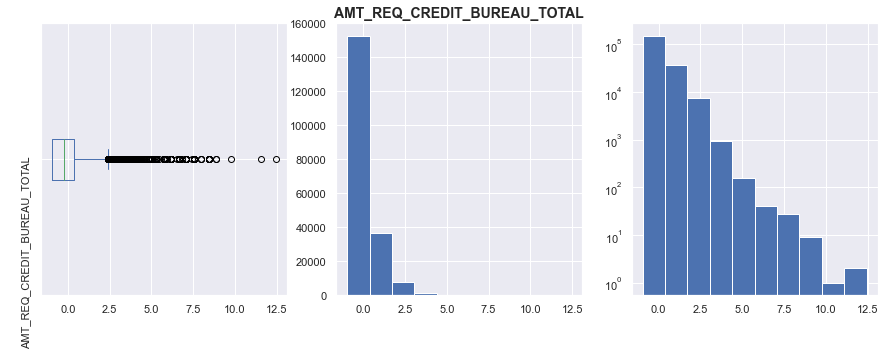

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
BIRTH_EMPLOYED_INTERVEL,0,197880,-0.509011,-0.485218,-0.465756,-0.070555,-0.437598,2.157061,0.865943,0.930561,1.922899,1.725453


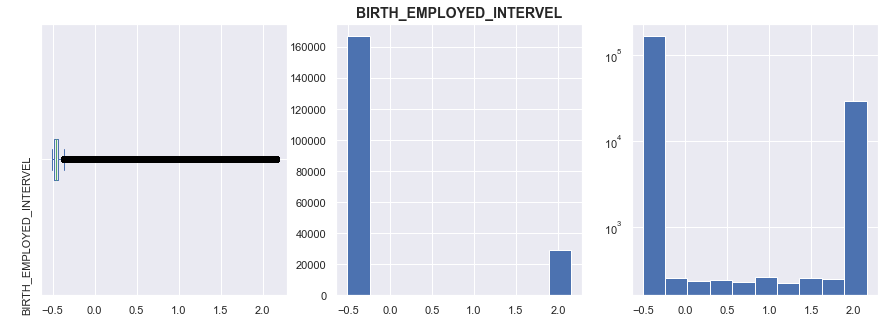

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
AMT_INCOME_TOTAL,0,197880,-0.523016,-0.206328,-0.098118,-0.017369,0.095330,426.009909,2.993296,1.730114,191.425389,41537.596842


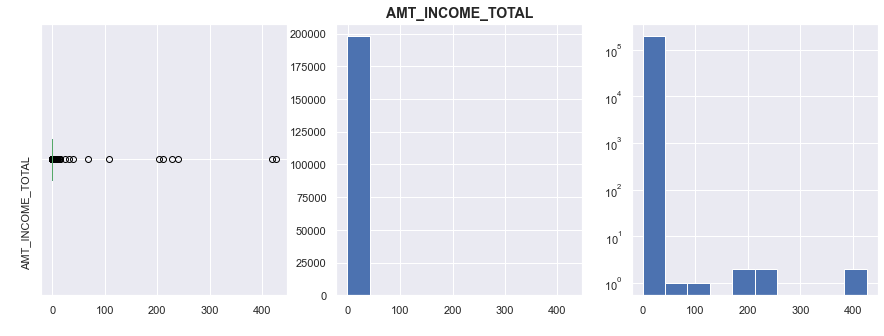

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
AMT_GOODS_PRICE,0,197880,-1.336283,-0.776050,-0.240174,-0.083281,0.368775,9.503013,0.791277,0.889538,1.486533,3.219706


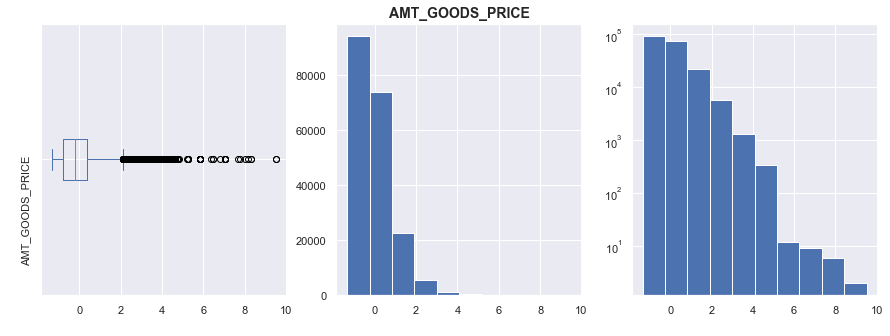

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
AMT_CREDIT_SUM_DEBT,0,197880,-2.533409,-0.249172,-0.200464,-0.021835,-0.041552,89.999775,0.693327,0.832663,28.525898,1878.436232


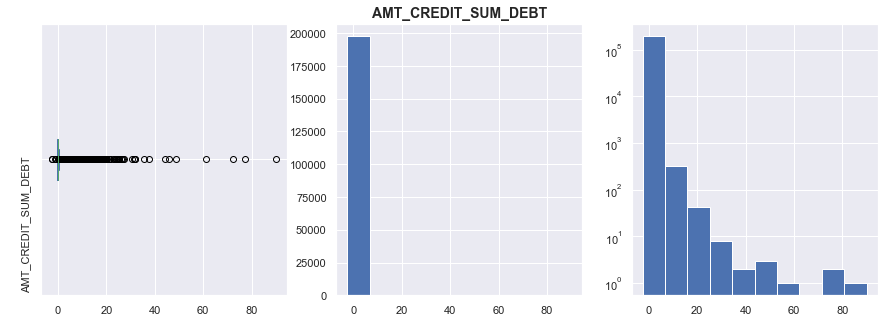

In [24]:
main_features_pd = nm.analyse_univariee(X_train2_sc_pd[main_features[0]])
for i in main_features[1:]:
    main_features_pd = main_features_pd.append(nm.analyse_univariee(X_train2_sc_pd[i]))

In [25]:
main_features_pd

,Null,Not Null,Min,Q1,Med,Mean,Q3,Max,Var,Std,Skew,Kurt
EXT_SOURCE_1,0,197880,-3.507449,-0.223228,0.013770,-0.141158,0.013770,3.206794,0.902906,0.950213,-0.356916,1.896935
EXT_SOURCE_2,0,197880,-2.695291,-1.031389,-0.050881,-0.254992,0.586068,1.783975,1.061189,1.030140,-0.484870,-0.769272
EXT_SOURCE_3,0,197880,-2.949046,-0.874392,0.091534,-0.213084,0.373182,2.177076,1.001918,1.000959,-0.407711,-0.292507
CODE_GENDER,0,197880,-0.721054,-0.721054,-0.721054,0.079287,1.386744,3.494542,0.961583,0.980603,0.494714,-1.681642
NAME_FAMILY_STATUS,0,197880,-1.259823,-0.404299,-0.404299,-0.020695,0.434608,3.017798,0.874787,0.935300,1.520016,2.218993
AMT_REQ_CREDIT_BUREAU_TOTAL,0,197880,-0.955329,-0.955329,-0.245477,-0.044731,0.383324,12.431208,0.891758,0.944329,1.432173,3.313377
BIRTH_EMPLOYED_INTERVEL,0,197880,-0.509011,-0.485218,-0.465756,-0.070555,-0.437598,2.157061,0.865943,0.930561,1.922899,1.725453
AMT_INCOME_TOTAL,0,197880,-0.523016,-0.206328,-0.098118,-0.017369,0.095330,426.009909,2.993296,1.730114,191.425389,41537.596842
AMT_GOODS_PRICE,0,197880,-1.336283,-0.776050,-0.240174,-0.083281,0.368775,9.503013,0.791277,0.889538,1.486533,3.219706
AMT_CREDIT_SUM_DEBT,0,197880,-2.533409,-0.249172,-0.200464,-0.021835,-0.041552,89.999775,0.693327,0.832663,28.525898,1878.436232


In [50]:
main_features_pd = main_features_pd.round(2)

In [51]:
main_features_pd.loc[main_features[1],"Min"]

-2.7

### Other

In [29]:
model_opti.predict(X_test2_sc[1].reshape(1,-1))

array([0.])

In [33]:
pred ={"proba_0" : model_opti.predict_proba(X_test2_sc[1].reshape(1,-1))[0][0], "proba_1" : model_opti.predict_proba(X_test2_sc[1].reshape(1,-1))[0][1]}

In [38]:
list(pred.keys()), list(pred.values())

(['proba_0', 'proba_1'], [0.7631183212187329, 0.2368816787812671])

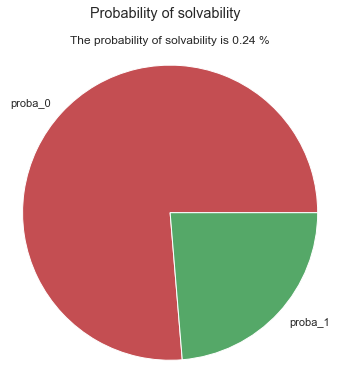

In [46]:
fig, ax = plt.subplots(1,1, figsize = (6,6))
fig.suptitle("Probability of solvability")
ax.set_title("The probability of solvability is {} %".format(round(pred["proba_1"],2)))
ax.pie(list(pred.values()), labels= list(pred.keys()) , colors=["r","g"])
ax.axis("square")
plt.show()

In [65]:
val = np.float32(0)
pyval = val.item()
print(type(val))
type(pyval)

<class 'numpy.float32'>


float

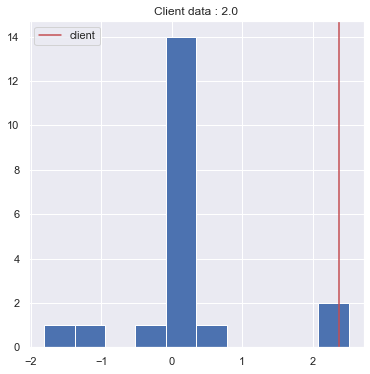

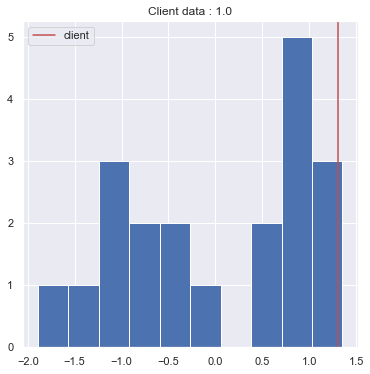

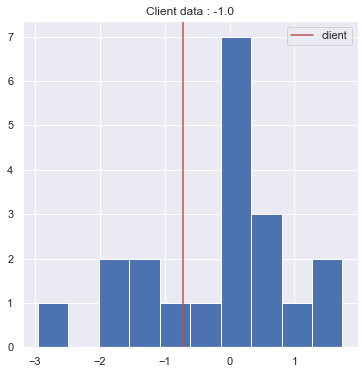

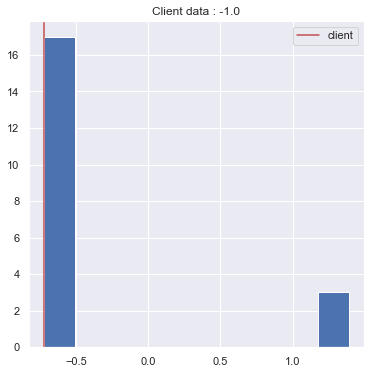

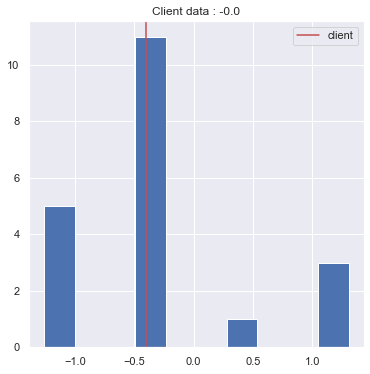

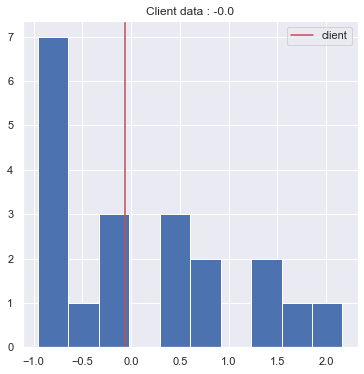

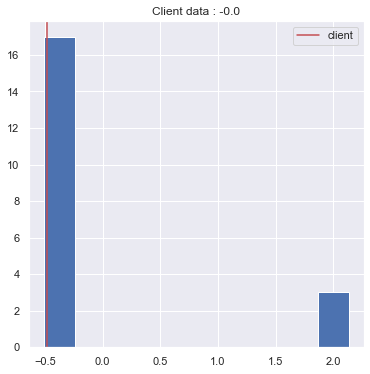

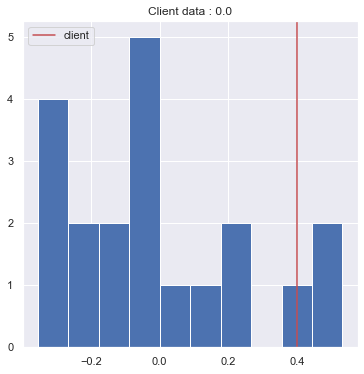

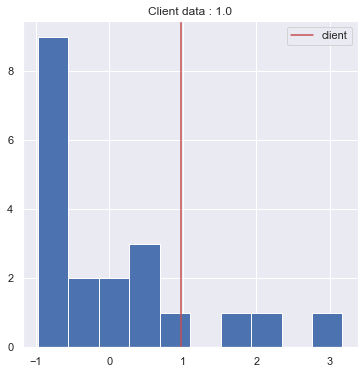

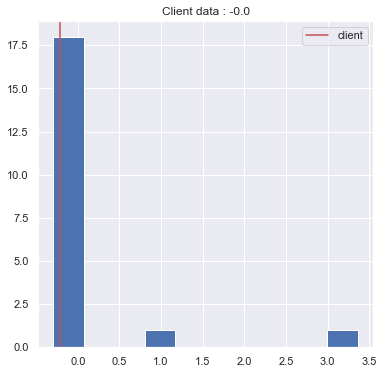

In [61]:
for var in main_features_pd.index:
    fig, ax = plt.subplots(1,1, figsize = (6,6))
    ax.set_title("Client data : {}".format(round(sample.loc[90265, var])))
    ax.hist(sample[var])
    ax.axvline(x = sample.loc[90265, var] , c= "r", label = 'client')
    ax.legend()

In [12]:
main_features_pd.to_csv("main_features_pd.csv", index=True, index_label="index")
X_train2_sc_pd_mean.to_csv("X_train2_sc_pd_mean.csv", index=True, index_label="index")
sample.to_csv("X_test2_sc_pd_sample.csv", index=True, index_label="index")

## Pipeline

In [ ]:
# categorical_encoder = Pipeline([("imputer", SimpleImputer(strategy="most_frequent")), ("label_encoder" , LabelEncoder())])
# numerical_pipe = SimpleImputer(strategy="median")

# preprocessing = ColumnTransformer(
#     [
#         ("categorical", categorical_encoder, cat_list ),
#         ("continuous", numerical_pipe, num_list),
#         ("discrete", SimpleImputer(strategy="most_frequent"), dis_num_list)
#     ]
# )

# pipeline = Pipeline(
#     [
#         ("preprocess", preprocessing),
#         ("scaler", StandardScaler()),
#         ("OSUS", osus),
#         ("classifier", LogisticRegression()),
#     ]
# )